<a href="https://colab.research.google.com/github/yulbeom/portfolio/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_10(kor2eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한국어 - 영어 병렬 코퍼스자료로 실습

In [2]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences # 패딩
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩

In [5]:
# !wget http://www.manythings.org/anki/kor-eng.zip

--2022-07-07 05:02:48--  http://www.manythings.org/anki/kor-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152572 (149K) [application/zip]
Saving to: ‘kor-eng.zip’

kor-eng.zip         100%[===================>] 149.00K   386KB/s    in 0.4s    

2022-07-07 05:02:49 (386 KB/s) - ‘kor-eng.zip’ saved [152572/152572]



In [6]:
# !sudo apt install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
# !unzip ./kor-eng.zip

Archive:  ./kor-eng.zip
  inflating: _about.txt              
  inflating: kor.txt                 


In [9]:
lines = pd.read_csv('./kor.txt', names=['src', 'tar', 'lic'], sep='\t')
lines

,src,tar,lic
0,Go.,가.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Hi.,안녕.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
2,Run!,뛰어!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run.,뛰어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
4,Who?,누구?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
...,...,...,...
3828,Science fiction has undoubtedly been the inspi...,공상 과학 소설은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
3829,I started a new blog. I'll do my best not to b...,난 블로그를 시작했어. 블로그를 초반에만 반짝 많이 하다가 관두는 사람처럼은 되지 ...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
3830,I think it's a shame that some foreign languag...,몇몇 외국어 선생님이 한 번도 원어민과 공부해본 적도 없으면서 대학을 나올 수 있었...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3831,If someone who doesn't know your background sa...,만일 네 사정도 잘 모르는 사람이 원어민 같다고 말한다면 그건 그 사람이 네가 원어...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [10]:
for i in lines.src.iloc[-5:]: 
  print(i, '\n')
  print('문장의 길이: ', len(i))

Science fiction has undoubtedly been the inspiration for many of the technologies that exist today. 

문장의 길이:  99
I started a new blog. I'll do my best not to be one of those people who blogs a lot right at the start and then quits blogging. 

문장의 길이:  127
I think it's a shame that some foreign language teachers were able to graduate from college without ever having studied with a native speaker. 

문장의 길이:  142
If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker. 

문장의 길이:  262
Doubtless there exists in this world precisely the right woman for any given man to marry and vice versa; but when you consider that a human being has the opportunity of being acquainted with only a few hundred people, and out of the few hundred that there are but a dozen or less whom he knows intimately, 

In [11]:
lines['length_src'] = lines.src.apply(lambda x:len(x))
lines['length_tar'] = lines.tar.apply(lambda x:len(x))

In [12]:
lines

,src,tar,lic,length_src,length_tar
0,Go.,가.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,2
1,Hi.,안녕.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,3
2,Run!,뛰어!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,4,3
3,Run.,뛰어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,4,3
4,Who?,누구?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,4,3
...,...,...,...,...,...
3828,Science fiction has undoubtedly been the inspi...,공상 과학 소설은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,99,44
3829,I started a new blog. I'll do my best not to b...,난 블로그를 시작했어. 블로그를 초반에만 반짝 많이 하다가 관두는 사람처럼은 되지 ...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,127,61
3830,I think it's a shame that some foreign languag...,몇몇 외국어 선생님이 한 번도 원어민과 공부해본 적도 없으면서 대학을 나올 수 있었...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,142,63
3831,If someone who doesn't know your background sa...,만일 네 사정도 잘 모르는 사람이 원어민 같다고 말한다면 그건 그 사람이 네가 원어...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,262,111


src 평균: 28.2
src 중앙값:  27.0
src 최대값:  537


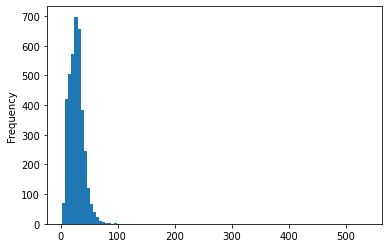

In [13]:
print('src 평균: %.1f' %(lines.length_src.mean()))
print('src 중앙값: ', lines.length_src.median())
print('src 최대값: ', lines.length_src.max())
lines.length_src.plot(kind='hist', bins=100)

tar 평균: 15.3
tar 중앙값:  14.0
tar 최대값:  296


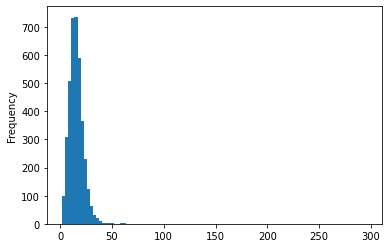

In [14]:
print('tar 평균: %.1f' %(lines.length_tar.mean()))
print('tar 중앙값: ', lines.length_tar.median())
print('tar 최대값: ', lines.length_tar.max())
lines.length_tar.plot(kind='hist', bins=100)

In [15]:
lines.shape

(3833, 5)

In [16]:
lines.sample(10)

,src,tar,lic,length_src,length_tar
1985,Can the price be discounted?,가격을 깎을 수 있나요?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,28,13
2870,"It's a ridiculous question, really.",참으로 황당한 질문이네.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,35,13
137,I laughed.,나는 웃었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,10,7
2273,Did you hear the announcement?,그 발표 들었니?,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,30,9
3637,Tom spends most of his time sitting on the porch.,톰은 대부분의 시간을 현관에 앉는 걸로 보내고 있어.,CC-BY 2.0 (France) Attribution: tatoeba.org #8...,49,29
3333,I wonder whether Tom really likes Boston.,톰이 진짜 보스턴을 좋아하는지 궁금하네.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,41,22
847,I warned you once.,난 널 한 번 경고했어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,18,13
3255,I used to go to Boston quite frequently.,난 보스턴에 꽤 자주 갔었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,40,16
1131,It rarely snows here.,여긴 거의 눈이 안 와.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,21,13
578,I love lasagna.,저는 라자냐를 좋아해요.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,15,13


In [17]:
lines_100 = lines.loc[lines.length_src <= 100]

In [18]:
lines_100.shape

(3829, 5)

In [19]:
lines_100[-5:]

,src,tar,lic,length_src,length_tar
3824,Why don't we just reformat the hard disk? You'...,우리 그냥 하드 디스크를 새로 포맷하는 건 어때? 너무 그걸로 스트레스 많이 받고 ...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,86,50
3825,"I knew that Tom was just a freshman, so I was ...","난 톰이 그냥 신입생일 뿐이라고만 알았는데, 그러다보니 톰이랑 선배들이 서로 어울려...",CC-BY 2.0 (France) Attribution: tatoeba.org #7...,92,59
3826,If your father asks your mother a question in ...,너의 아버지가 어머니에게 만약 프랑스어로 질문을 하면 그녀는 프랑스어로 대답하니 아...,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,94,58
3827,Tom always cried when his sister took away his...,"톰은 누나가 자기 장난감을 빼앗아 갔을 때마다 울음을 터뜨렸고, 누나는 바로 그런 ...",CC-BY 2.0 (France) Attribution: tatoeba.org #8...,97,63
3828,Science fiction has undoubtedly been the inspi...,공상 과학 소설은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,99,44


In [20]:
lines_100 = lines_100.reset_index()

In [21]:
lines_100[-5:]

,index,src,tar,lic,length_src,length_tar
3824,3824,Why don't we just reformat the hard disk? You'...,우리 그냥 하드 디스크를 새로 포맷하는 건 어때? 너무 그걸로 스트레스 많이 받고 ...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,86,50
3825,3825,"I knew that Tom was just a freshman, so I was ...","난 톰이 그냥 신입생일 뿐이라고만 알았는데, 그러다보니 톰이랑 선배들이 서로 어울려...",CC-BY 2.0 (France) Attribution: tatoeba.org #7...,92,59
3826,3826,If your father asks your mother a question in ...,너의 아버지가 어머니에게 만약 프랑스어로 질문을 하면 그녀는 프랑스어로 대답하니 아...,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,94,58
3827,3827,Tom always cried when his sister took away his...,"톰은 누나가 자기 장난감을 빼앗아 갔을 때마다 울음을 터뜨렸고, 누나는 바로 그런 ...",CC-BY 2.0 (France) Attribution: tatoeba.org #8...,97,63
3828,3828,Science fiction has undoubtedly been the inspi...,공상 과학 소설은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,99,44


In [22]:
lines_100.columns

Index(['index', 'src', 'tar', 'lic', 'length_src', 'length_tar'], dtype='object')

In [23]:
lines_100.drop(['index', 'lic', 'length_src', 'length_tar'], axis=1, inplace=True)

In [24]:
lines_100.sample(10)

,src,tar
391,"Beef, please.",쇠고기요.
2956,It took me several hours to do that.,그걸 하려고 몇 시간이 걸렸어요.
2227,"Tom isn't here, I assure you.","톰은 여기 없어, 내가 장담해."
67,Who won?,누가 이겼어?
2354,Tom often lets me use his car.,톰은 가끔 내가 톰의 차를 쓰도록 해줘.
2276,Do you think we could do that?,우리가 그걸 할 수 있다 생각해?
3339,Remember that we're all in the same boat.,우리 모두가 같은 한 배를 탔다는 걸 기억해라.
2432,Neither of my parents can swim.,우리 부모님은 수영을 못하셔.
63,Wake up!,일어나!
1554,What's the horse's name?,그 말의 이름이 뭐야?


In [25]:
lines_100['tar'] = lines_100.tar.apply(lambda x: '\t ' + x + ' \n')

In [26]:
lines_100.sample(10)

,src,tar
1013,His dream came true.,\t 그 사람의 꿈은 실현되었어. \n
3783,You should try to see things from the practica...,\t 실용적 관점으로 보려고 노력해야 할 것 같아. \n
3787,Tom talks to his mother more often than he tal...,\t 톰은 아버지보다 어머니와 대화를 더 자주 한다. \n
2681,This isn't our final destination.,\t 이게 우리의 최종 목표가 아냐. \n
19,Relax.,\t 진정해. \n
3757,The Mississippi is the longest river in the Un...,\t 미시시피는 미국에서 가장 긴 강이야. \n
3726,That girl is under the delusion that she is a ...,\t 저 여자애는 자기가 공주라는 망상에 빠져 있어. \n
1983,Are you trying to hit on me?,\t 지금 나를 유혹하는 거야? \n
3584,Why does everybody think Tom and I are stupid?,\t 왜 다들 나랑 톰이 멍청하다고 생각해? \n
3291,Tom spent Christmas in Boston with Mary.,\t 톰은 메리와 함께 크리스마스를 보스턴에서 보냈어. \n


In [27]:
src_vocab = set()
for line in lines_100.src:
  for char in line:
    src_vocab.add(char)

tar_vocab = set()
for line in lines_100.tar:
  for char in line:
    tar_vocab.add(char)

In [28]:
print('src_vocab:', '\n', src_vocab)
print('src_vocab length: ', len(src_vocab), '\n')
print('tar_vocab:', '\n', tar_vocab)
print('tar_vocab length: ', len(tar_vocab))

src_vocab: 
 {'j', 'n', 'g', 'U', 'K', ',', '3', '"', 'B', '!', 'W', 'S', 'P', '0', 'c', 'H', 'E', 'A', 'l', 'w', 'r', 'N', 'D', '-', 'F', 'O', 'f', '4', 'z', 'a', '5', ':', '$', 'k', '%', '2', '°', '1', "'", 'Y', '6', 'u', '7', 't', 'o', 'y', 'm', 'q', 'V', '9', 'd', 'M', '?', 'Q', 'ï', 'G', 'R', 'b', 'T', 'p', 'J', 'h', 's', '8', ';', '.', 'i', 'x', 'L', 'v', 'I', ' ', 'C', 'e'}
src_vocab length:  74 

tar_vocab: 
 {'넛', '루', '께', '덴', '꾼', '펙', '류', '삼', '혜', '떴', '짧', '할', '현', '캐', '럴', '력', '쁠', '껍', '전', '1', '방', '붙', '꺼', '렛', '찮', '찌', '악', '수', '재', '참', '유', '조', '랍', '쟁', '딸', '덕', 'M', '앨', '홋', '밌', '쓸', '램', '끝', '씨', '배', '빠', '향', '꺾', '실', '비', '늙', '견', '영', '냐', '반', '갑', '쫓', '에', '처', '튼', '둑', '넘', '뜻', '론', '부', '끼', '던', '댔', '케', '꽤', '외', '똑', '앓', '렌', '광', '뀌', '늄', '얗', '굼', '뿐', '규', '둔', '끌', '판', '끊', '래', '찍', '셈', '먼', '빨', '엘', '하', '풀', '졌', '르', '옮', '양', '녹', '넷', '귄', '내', ' ', '린', '쏠', '갇', '업', '럽', '샀', '민', '찔', '뽀', '쁜', '레', '둘', 'H', '녕'

In [29]:
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1
print('src_vocab_size: ', src_vocab_size)
print('tar_vocab_size: ', tar_vocab_size)

src_vocab_size:  75
tar_vocab_size:  918


In [30]:
src_vocab = sorted(src_vocab)
tar_vocab = sorted(tar_vocab)

In [31]:
print(src_vocab[50:75])
print(tar_vocab[:2])

['e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '°', 'ï']
['\t', '\n']


In [32]:
print(src_vocab[:2])
print(tar_vocab[:2])

[' ', '!']
['\t', '\n']


In [33]:
# dict([('a', 'b')])
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])

In [34]:
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, "'": 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '?': 22, 'A': 23, 'B': 24, 'C': 25, 'D': 26, 'E': 27, 'F': 28, 'G': 29, 'H': 30, 'I': 31, 'J': 32, 'K': 33, 'L': 34, 'M': 35, 'N': 36, 'O': 37, 'P': 38, 'Q': 39, 'R': 40, 'S': 41, 'T': 42, 'U': 43, 'V': 44, 'W': 45, 'Y': 46, 'a': 47, 'b': 48, 'c': 49, 'd': 50, 'e': 51, 'f': 52, 'g': 53, 'h': 54, 'i': 55, 'j': 56, 'k': 57, 'l': 58, 'm': 59, 'n': 60, 'o': 61, 'p': 62, 'q': 63, 'r': 64, 's': 65, 't': 66, 'u': 67, 'v': 68, 'w': 69, 'x': 70, 'y': 71, 'z': 72, '°': 73, 'ï': 74}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '%': 6, '(': 7, ')': 8, ',': 9, '-': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'H': 29, 'M': 30, 'N': 31, 'T': 32, 'V': 33, 'a': 34, 'd': 35, 'h': 36, 'i': 37, 'm': 38, 'o': 3

In [35]:
src_to_index['a']

47

In [36]:
encoder_input = []

for line in lines_100.src:
  encoded_line = []
  for char in line:
    encoded_line.append(src_to_index[char])
  encoder_input.append(encoded_line)

In [37]:
print('src 문장 인코딩: ', encoder_input[:5])
print('src 문장 원본  : ', '\n', lines_100.src[:5])
print('src 문장 인코딩 last_one: ', encoder_input[-1])

src 문장 인코딩:  [[29, 61, 9], [30, 55, 9], [40, 67, 60, 2], [40, 67, 60, 9], [45, 54, 61, 22]]
src 문장 원본  :  
 0     Go.
1     Hi.
2    Run!
3    Run.
4    Who?
Name: src, dtype: object
src 문장 인코딩 last_one:  [41, 49, 55, 51, 60, 49, 51, 1, 52, 55, 49, 66, 55, 61, 60, 1, 54, 47, 65, 1, 67, 60, 50, 61, 67, 48, 66, 51, 50, 58, 71, 1, 48, 51, 51, 60, 1, 66, 54, 51, 1, 55, 60, 65, 62, 55, 64, 47, 66, 55, 61, 60, 1, 52, 61, 64, 1, 59, 47, 60, 71, 1, 61, 52, 1, 66, 54, 51, 1, 66, 51, 49, 54, 60, 61, 58, 61, 53, 55, 51, 65, 1, 66, 54, 47, 66, 1, 51, 70, 55, 65, 66, 1, 66, 61, 50, 47, 71, 9]


In [38]:
decoder_input = []

for line in lines_100.tar:
  encoded_line = []
  for char in line:
    encoded_line.append(tar_to_index[char])
  decoder_input.append(encoded_line)

In [39]:
print('src 문장 인코딩: ', decoder_input[:5])
print('src 문장 원본  : ', '\n', lines_100.tar[:5])

src 문장 인코딩:  [[1, 3, 45, 11, 3, 2], [1, 3, 552, 197, 11, 3, 2], [1, 3, 290, 574, 4, 3, 2], [1, 3, 290, 574, 11, 3, 2], [1, 3, 208, 97, 24, 3, 2]]
src 문장 원본  :  
 0     \t 가. \n
1    \t 안녕. \n
2    \t 뛰어! \n
3    \t 뛰어. \n
4    \t 누구? \n
Name: tar, dtype: object


In [40]:
decoder_target = []

for line in lines_100.tar:
  timestep = 0
  encoded_line = []
  for char in line:
    if timestep > 0: # 문장에 첫번째 char(문자) 제거, '\t' 제거
      encoded_line.append(tar_to_index[char])
    timestep += 1
  decoder_target.append(encoded_line)

In [41]:
print(encoder_input[:5])
print(decoder_input[:5])
print(decoder_target[:5])

[[29, 61, 9], [30, 55, 9], [40, 67, 60, 2], [40, 67, 60, 9], [45, 54, 61, 22]]
[[1, 3, 45, 11, 3, 2], [1, 3, 552, 197, 11, 3, 2], [1, 3, 290, 574, 4, 3, 2], [1, 3, 290, 574, 11, 3, 2], [1, 3, 208, 97, 24, 3, 2]]
[[3, 45, 11, 3, 2], [3, 552, 197, 11, 3, 2], [3, 290, 574, 4, 3, 2], [3, 290, 574, 11, 3, 2], [3, 208, 97, 24, 3, 2]]


In [42]:
max_src_len = max([len(line) for line in lines_100.src])
max_tar_len = max([len(line) for line in lines_100.tar])
print('max_src_len: ', max_src_len)
print('max_tar_len: ', max_tar_len)

max_src_len:  99
max_tar_len:  67


In [43]:
# 패딩
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

In [44]:
print(encoder_input[0])
print(len(encoder_input[0]))
print(decoder_input[0])
print(len(decoder_input[0]))
print(decoder_target[0])
print(len(decoder_target[0]))

[29 61  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
99
[ 1  3 45 11  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
67
[ 3 45 11  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
67


In [45]:
# 원-핫 벡터
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

In [46]:
print('encoder input dim: ', encoder_input.shape)
print('number of samples: ', lines_100.shape[0])
print('max_src_len: ', max_src_len)
print('src_vocab_size: ', src_vocab_size)
print('-'*40)
print('decoder input dim: ', decoder_input.shape)
print('number of samples: ', lines_100.shape[0])
print('max_tar_len: ', max_tar_len)
print('tar_vocab_size: ', tar_vocab_size)
print('-'*40)
print('decoder target dim: ', decoder_target.shape)

encoder input dim:  (3829, 99, 75)
number of samples:  3829
max_src_len:  99
src_vocab_size:  75
----------------------------------------
decoder input dim:  (3829, 67, 918)
number of samples:  3829
max_tar_len:  67
tar_vocab_size:  918
----------------------------------------
decoder target dim:  (3829, 67, 918)


In [47]:
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np

In [48]:
print(Input(82))
print(Input(shape=(82)))
print(Input(shape=(None, src_vocab_size)))

KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 75), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [49]:
encoder_input_test = Input(82)
encoder_inputs = Input(shape=(None, src_vocab_size))

In [50]:
print(LSTM(units=256)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=False)(encoder_inputs))
print(LSTM(units=256, return_sequences=False, return_state=True)(encoder_inputs))
print(LSTM(units=256, return_sequences=True, return_state=True)(encoder_inputs))

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm/PartitionedCall:0', description="created by layer 'lstm'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_1/PartitionedCall:1', description="created by layer 'lstm_1'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_2')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_2')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_2')>]
[<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_3')>]


In [51]:
encoder_rnn = SimpleRNN(256, return_state=True)
encoder_lstm = LSTM(units=256, return_state=True)

In [52]:
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

In [53]:
print('encoder_outputs: ', encoder_outputs)
print('state_h: ', state_h)
print('state_c: ', state_c)

encoder_outputs:  KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_4/PartitionedCall:0', description="created by layer 'lstm_4'")
state_h:  KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_4/PartitionedCall:2', description="created by layer 'lstm_4'")
state_c:  KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_4/PartitionedCall:3', description="created by layer 'lstm_4'")


In [54]:
encoder_states = [state_h, state_c]
print(encoder_states) # context vector

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>]


In [55]:
print(tar_vocab_size)
decoder_inputs = Input(shape=(None, tar_vocab_size))

918


In [56]:
decoder_inputs

<KerasTensor: shape=(None, None, 918) dtype=float32 (created by layer 'input_6')>

In [57]:
decoder_lstm = LSTM(units=256, return_state=True, return_sequences=True)

In [58]:
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

In [59]:
print(decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_5/PartitionedCall:1', description="created by layer 'lstm_5'")


In [60]:
print(tar_vocab_size)
decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')

918


In [61]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)

In [62]:
print(decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 918), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")


In [63]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model)

In [64]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 75)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None, 918)]  0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 256),        339968      ['input_5[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [66]:
model.fit(x=[encoder_input, decoder_input], y=decoder_target,
          batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
48/48 [==============================] - 52s 1s/step - loss: 1.4992 - val_loss: 1.9506
Epoch 2/30
48/48 [==============================] - 48s 1s/step - loss: 1.0724 - val_loss: 1.8445
Epoch 3/30
48/48 [==============================] - 49s 1s/step - loss: 1.0186 - val_loss: 2.0112
Epoch 4/30
48/48 [==============================] - 48s 1s/step - loss: 0.9589 - val_loss: 1.8749
Epoch 5/30
48/48 [==============================] - 48s 999ms/step - loss: 0.8970 - val_loss: 1.6981
Epoch 6/30
48/48 [==============================] - 48s 997ms/step - loss: 0.8274 - val_loss: 1.5593
Epoch 7/30
48/48 [==============================] - 48s 997ms/step - loss: 0.7692 - val_loss: 2.9770
Epoch 8/30
48/48 [==============================] - 48s 997ms/step - loss: 0.7496 - val_loss: 1.3577
Epoch 9/30
48/48 [==============================] - 48s 1000ms/step - loss: 0.7146 - val_loss: 1.3478
Epoch 10/30
48/48 [==============================] - 48s 1s/step - loss: 0.6936 - val_loss: 1.3025
Epo

In [67]:
model.save_weights('ed_kor_eng_0706.h5')

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 75)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None, 918)]  0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 256),        339968      ['input_5[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [69]:
print(encoder_inputs)
print(decoder_inputs)
print(encoder_states)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 75), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 918), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>]


In [70]:
encoder_model = Model(inputs=encoder_inputs , outputs=encoder_states)

In [71]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 75)]        0         
                                                                 
 lstm_4 (LSTM)               [(None, 256),             339968    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 339,968
Trainable params: 339,968
Non-trainable params: 0
_________________________________________________________________


In [72]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]
print(decoder_state_input_h)
print(decoder_state_input_c)

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_7'), name='input_7', description="created by layer 'input_7'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'")


In [73]:
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_input)

In [74]:
decoder_states = [state_h, state_c]
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_state_input,
                      outputs=[decoder_outputs, state_h, state_c])

In [75]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, 918)]  0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 lstm_5 (LSTM)                  [(None, None, 256),  1203200     ['input_6[0][0]',                
                                 (None, 256),                     'input_7[0][0]',          

In [76]:
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

In [77]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 75)]        0         
                                                                 
 lstm_4 (LSTM)               [(None, 256),             339968    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 339,968
Trainable params: 339,968
Non-trainable params: 0
_________________________________________________________________


In [78]:
print(encoder_input.shape)
print(encoder_input[:1].shape)

(3829, 99, 75)
(1, 99, 75)


In [79]:
states_value = encoder_model.predict(encoder_input[:1])

In [80]:
print('encoder_states_value')
print('*'*75)
print('len(states_value): ', len(states_value))
print('-'*70)
print('h: ', states_value[0])
print('h dim: ', states_value[0].shape)
print('-'*70)
print('c: ', states_value[1])
print('c dim: ', states_value[1].shape)
print('-'*70)

encoder_states_value
***************************************************************************
len(states_value):  2
----------------------------------------------------------------------
h:  [[ 7.61463344e-01  9.84100938e-01  6.53654337e-03 -1.30938217e-02
  -9.28904772e-01  5.79637429e-03  9.87295270e-01  4.27414984e-01
  -2.25098263e-02  7.49822795e-01  9.82824266e-01  4.41090018e-02
  -1.48204923e-01 -8.15946937e-01  9.76875544e-01 -1.31073922e-01
   4.75356281e-02  1.95125514e-03  4.03102040e-02 -7.63501525e-02
   8.90111506e-01 -2.89824791e-02 -1.29058361e-02  2.32322335e-01
  -5.26213320e-04  9.93830681e-01  4.50102286e-03 -9.47212458e-01
  -8.58333230e-01  9.87712801e-01  9.70809281e-01  7.63794780e-03
  -5.44966012e-03  2.08118051e-01  5.07672131e-01 -3.01675797e-01
  -5.65196574e-01  9.41117346e-01  5.27343750e-02 -9.35046673e-01
   8.85446183e-03  1.60592683e-02 -2.70188483e-03 -2.06292961e-02
   2.06619259e-02  4.97605316e-02  9.81964409e-01 -9.08957183e-01
  -9.55830991e

In [81]:
# <sos> 입력값 생성
print(np.zeros((2,2)))
print(tar_vocab_size)
print(np.zeros((1,1,tar_vocab_size)))
target_seq = np.zeros((1,1,tar_vocab_size))
print(target_seq.shape)

[[0. 0.]
 [0. 0.]]
918
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [82]:
type(tar_to_index)

dict

In [83]:
tar_to_index
#tar_to_index['\t']

{'\t': 1,
 '\n': 2,
 ' ': 3,
 '!': 4,
 '"': 5,
 '%': 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 '0': 13,
 '1': 14,
 '2': 15,
 '3': 16,
 '4': 17,
 '5': 18,
 '6': 19,
 '7': 20,
 '8': 21,
 '9': 22,
 ':': 23,
 '?': 24,
 'A': 25,
 'B': 26,
 'C': 27,
 'D': 28,
 'H': 29,
 'M': 30,
 'N': 31,
 'T': 32,
 'V': 33,
 'a': 34,
 'd': 35,
 'h': 36,
 'i': 37,
 'm': 38,
 'o': 39,
 'p': 40,
 'r': 41,
 't': 42,
 'y': 43,
 '°': 44,
 '가': 45,
 '각': 46,
 '간': 47,
 '갇': 48,
 '갈': 49,
 '감': 50,
 '갑': 51,
 '값': 52,
 '갔': 53,
 '강': 54,
 '갖': 55,
 '같': 56,
 '개': 57,
 '객': 58,
 '갰': 59,
 '걀': 60,
 '걔': 61,
 '거': 62,
 '걱': 63,
 '건': 64,
 '걷': 65,
 '걸': 66,
 '검': 67,
 '겁': 68,
 '것': 69,
 '게': 70,
 '겐': 71,
 '겠': 72,
 '겨': 73,
 '격': 74,
 '겪': 75,
 '견': 76,
 '결': 77,
 '겼': 78,
 '경': 79,
 '계': 80,
 '고': 81,
 '곡': 82,
 '곤': 83,
 '곧': 84,
 '골': 85,
 '곰': 86,
 '곱': 87,
 '곳': 88,
 '공': 89,
 '과': 90,
 '관': 91,
 '광': 92,
 '괜': 93,
 '괴': 94,
 '굉': 95,
 '교': 96,
 '구': 97,
 '국': 98,
 '군': 99,
 '굳': 100,
 '굴': 

In [84]:
target_seq[0,0,1] = 1

In [85]:
print(target_seq)
print(target_seq.shape)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [88]:
print('1 target_seq (<sos>, decoder model 예측 시 입력)')
print('*' * 75)
print('target_seq:', '\n', target_seq)
print('target_seq[0][0]: ', target_seq[0][0])
print('len(target_seq[0][0]): ', len(target_seq[0][0]))
print('target_seq.shape: ', target_seq.shape)
print('*' * 75)
print('2 states_value (인코더 모델 히든, 셀 상태 출력을 예측 시 입력)')
print('*' * 75)
print('states_value:', '\n', states_value)
print('len(states_value):', len(states_value))
print('*' * 75)
print('2.1 히든 상태값 (state_value[0])')
print('-' * 70)
print(states_value[0])
print('states_value[0].shape:', states_value[0].shape)
print('-' * 70, '\n')

print('2.2 셀 상태값 (state_value[1])')
print('-' * 70)
print(states_value[1])
print('states_value[1].shape:', states_value[1].shape)
print('-' * 70, '\n')

1 target_seq (<sos>, decoder model 예측 시 입력)
***************************************************************************
target_seq: 
 [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  

In [89]:
pre_input = [target_seq] + states_value
print(pre_input)
print(len(pre_input))
print('sos: ', pre_input[0])
print('sos dim: ', pre_input[0].shape)
print('h: ', pre_input[1])
print('h dim: ', pre_input[1].shape)
print('c: ', pre_input[2])
print('c dim: ', pre_input[2].shape)

[array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [90]:
output_tokens, h, c = decoder_model.predict(pre_input)

In [91]:
print('output_tokens:', '\n', output_tokens)
print('output_tokens.shape: ', output_tokens.shape)
print('sum of output_tokens: ', np.sum(output_tokens))
print('max value index: ', np.argmax(output_tokens))
sampled_token_index = np.argmax(output_tokens)
print('index_to_tar: ', index_to_tar)
print('character: ', index_to_tar[sampled_token_index])
sampled_char = index_to_tar[sampled_token_index]

output_tokens: 
 [[[5.61711745e-12 2.21798751e-12 1.52485351e-11 9.99887824e-01
   2.15319361e-07 8.39790404e-10 1.82605428e-12 6.90920599e-10
   2.31115882e-09 7.75837123e-07 6.01375505e-10 1.24412569e-09
   1.72679069e-12 8.14143808e-10 4.48966997e-09 3.26020599e-10
   1.23610011e-09 1.14380116e-09 1.87797711e-09 1.58188296e-09
   5.08193904e-11 3.58863522e-10 2.49351755e-12 5.56668253e-11
   1.52782675e-10 1.76439213e-12 2.70887878e-11 1.13890029e-10
   2.09889241e-11 8.02051897e-11 1.15845987e-11 2.05389091e-12
   1.59689784e-09 1.29710110e-12 9.00600636e-11 1.95737676e-10
   2.49911480e-10 1.18784094e-10 1.42012961e-08 7.05228043e-10
   1.68485648e-09 3.16672411e-10 3.97973460e-10 1.01476172e-09
   2.76748152e-10 1.33383276e-06 1.08682854e-11 2.61595057e-09
   2.82298815e-12 3.93536759e-09 3.29531318e-08 5.64648051e-10
   9.54849828e-12 1.27269917e-09 4.13649808e-08 6.15965196e-11
   1.71527894e-08 4.32157021e-09 1.45314154e-12 8.68328413e-12
   3.29069758e-11 6.10100581e-10 2.257

In [92]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 원-핫 벡터 생성
  target_seq = np.zeros((1, 1, tar_vocab_size))
  target_seq[0, 0, tar_to_index['\t']] = 1.

  stop_condition = False
  decoded_sentence = ""

  # stop_condition이 True가 될 때까지 루프 반복
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

    # 예측 결과를 문자로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 문자를 예측 문장에 추가
    decoded_sentence += sampled_char

    # <eos>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_char == '\n' or
        len(decoded_sentence) > max_tar_len):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, sampled_token_index] = 1.

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence

In [93]:
print(lines.iloc[10])
print(decode_sequence(encoder_input[10:11]))

src                                                       Wait!
tar                                                        기다려!
lic           CC-BY 2.0 (France) Attribution: tatoeba.org #1...
length_src                                                    5
length_tar                                                    4
Name: 10, dtype: object
 그 사람은 아직 이상 어려워. 



In [94]:
for i in range(1, 100):
  print('입력문장:', lines_100.src[i])
  print('출력문장:', lines_100.tar[i][2:-1])
  print('예측문장:', decode_sequence(encoder_input[i:i+1])[1:-1])
  print('-'*30)

입력문장: Hi.
출력문장: 안녕. 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Run!
출력문장: 뛰어! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Run.
출력문장: 뛰어. 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Who?
출력문장: 누구? 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Wow!
출력문장: 우와! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Fire!
출력문장: 쏴! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Help!
출력문장: 도와줘! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Jump!
출력문장: 점프! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Jump.
출력문장: 점프해. 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Wait!
출력문장: 기다려! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Wait!
출력문장: 잠깐! 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Wait.
출력문장: 기다려. 
예측문장: 그 사람은 아직 이상 어려워. 
------------------------------
입력문장: Begin.
출력문장: 시작해. 
예측문장: 그 사람은 아직 이상 어려워. 
------------------